<ipython-input-2-46fce0ec76cd>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rima', y='Cantidad', data=df_rimas, palette=COLORES, ax=ax[0])
<ipython-input-2-46fce0ec76cd>:65: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='Rima', y='Cantidad', data=df_rimas, palette=COLORES, ax=ax[0])


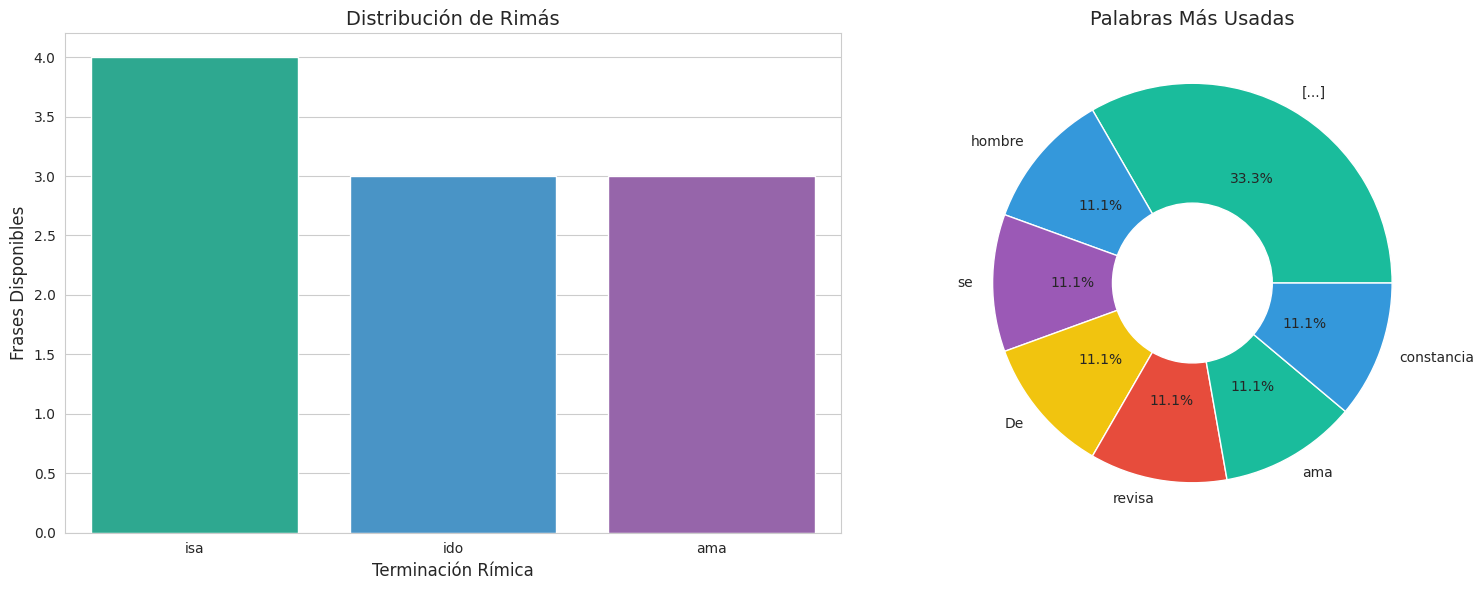


📊 Tabla de Rimas Disponibles:


,Rima,Frases
0,isa,"La voluntad de un hombre, no se mide por su so..."
1,ido,"De su alma, que expone el sentido\nDe su disci..."
2,ama,"De confianza, sencillez que prende la llama\nD..."



🎤 Muestra de Nuevas Frases Generadas:


,Frase,Rima
5,"Sueña, persevera y [...] constancia que ama",ama
3,"Repetidamente encuentra paz, [...] expone el s...",ido
4,"De confianza, sencillez [...] constancia que ama",ama
0,Cuando la rima [...] hombre se revisa,isa
1,Ni tampoco por [...] hombre se revisa,isa


In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
COLORES = ['#1abc9c', '#3498db', '#9b59b6', '#f1c40f', '#e74c3c']

# Rima que me inventé
frases_creadas = [
    "La voluntad de un hombre, no se mide por su sonrisa",
    "Ni tampoco por la pinta de su pantalón o su camisa",
    "La voluntad de un hombre se revisa",
    "Cuando la rima de su alma sincroniza con la brisa",
    "De su alma, que expone el sentido",
    "De su disciplina, fé e irradiancia cuando su latido",
    "Repetidamente encuentra paz, tranquilidad seguido",
    "De confianza, sencillez que prende la llama",
    "De resistencia, lucha y constancia que ama",
    "Sueña, persevera y alcanza cualquier tipo de flama"
]

def obtener_rima(frase, n=3):
    """Extrae la rima final normalizada"""
    return frase.lower().replace(" ", "").replace(",", "").replace("'", "")[-n:]

def generar_datos(n_rima=3, division=3):
    """Genera rimas y nuevas frases"""
    rimas_dict = {}
    for frase in frases_creadas:
        clave = obtener_rima(frase, n_rima)
        rimas_dict.setdefault(clave, []).append(frase)

    nuevas_frases = []
    for clave, grupo in rimas_dict.items():
        if len(grupo) >= 2:
            for _ in range(min(2, len(grupo))):
                try:
                    frases_combinar = random.sample(grupo, 2)
                    inicio = frases_combinar[0].split()[:division]
                    final = frases_combinar[1].split()[-division:]
                    nueva = ' '.join(inicio + ["[...]"] + final)
                    nuevas_frases.append((nueva, clave))
                except:
                    continue
    return rimas_dict, nuevas_frases

def mostrar_informe_estatico(n_rima=3, division=3):
    """Genera un reporte estático"""
    # Generar datos
    rimas_data, nuevas_frases = generar_datos(n_rima, division)
    df_nuevas = pd.DataFrame(nuevas_frases, columns=['Frase', 'Rima'])

    # Crear figura
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico 1: Distribución de rimas
    if rimas_data:
        df_rimas = pd.DataFrame({
            'Rima': rimas_data.keys(),
            'Cantidad': [len(v) for v in rimas_data.values()]
        })
        sns.barplot(x='Rima', y='Cantidad', data=df_rimas, palette=COLORES, ax=ax[0])
        ax[0].set_title('Distribución de Rimás', fontsize=14)
        ax[0].set_xlabel('Terminación Rímica', fontsize=12)
        ax[0].set_ylabel('Frases Disponibles', fontsize=12)
    else:
        ax[0].axis('off')
        ax[0].text(0.5, 0.5, 'No hay datos con estos parámetros',
                  ha='center', va='center', fontsize=12)

    # Gráfico 2: Palabras comunes
    if not df_nuevas.empty:
        palabras = ' '.join(df_nuevas['Frase']).split()
        top_palabras = pd.Series(palabras).value_counts()[:7]
        top_palabras.plot.pie(
            autopct='%1.1f%%', colors=COLORES, ax=ax[1],
            wedgeprops={'width': 0.6, 'edgecolor': 'w'}
        )
        ax[1].set_title('Palabras Más Usadas', fontsize=14)
        ax[1].set_ylabel('')
    else:
        ax[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Mostrar tablas de datos
    if rimas_data:
        print("\n📊 Tabla de Rimas Disponibles:")
        display(pd.DataFrame({
            'Rima': rimas_data.keys(),
            'Frases': ['\n'.join(v) for v in rimas_data.values()]
        }))

    print("\n🎤 Muestra de Nuevas Frases Generadas:")
    if not df_nuevas.empty:
        display(df_nuevas.sample(min(5, len(df_nuevas)), replace=False))
    else:
        print("No se generaron frases con los parámetros actuales")

# Ejecutar el informe estático con parámetros por defecto
mostrar_informe_estatico(n_rima=3, division=3)

# **Aplicación Sorpresa**-**Generador de Rimas**

In [3]:
import requests

API_KEY = 'sk-53751d5c6f344a5dbc0571de9f51313e'
API_URL = 'https://api.deepseek.com/v1/chat/completions'

def generar_prompt_interactivo():
    """Recolecta parámetros para la rima y construye el prompt"""
    print("\n=== Configura tu rima ===")
    estilo = input("Estilo (ej. soneto, haiku, libre, rap): ")
    tema = input("Tema principal (ej. amor, naturaleza, tecnología): ")
    tono = input("Tono (ej. alegre, melancólico, irónico): ")
    palabras_clave = input("Palabras clave a incluir (separadas por comas): ")
    rima_patron = input("Patrón de rima (ej. ABAB, AABB) o 'libre': ")

    return f"""Crea una rima creativa con estos elementos:
- Estilo: {estilo}
- Tema principal: {tema}
- Tono: {tono}
- Palabras clave a incluir: {palabras_clave}
- Patrón de rima: {rima_patron}
- Longitud: Entre 4 y 8 versos
- Musicalidad: Cuida el ritmo y la cadencia

Incluye un título creativo y asegúrate de que las rimas sean consistentes."""

def generar_rima(prompt, temperatura=0.85):
    """Genera la rima con parámetros creativos"""
    headers = {
        'Authorization': f'Bearer {API_KEY}',
        'Content-Type': 'application/json'
    }

    data = {
        'model': 'deepseek-chat',
        'temperature': temperatura,
        'messages': [{
            'role': 'user',
            'content': prompt
        }]
    }

    try:
        response = requests.post(API_URL, headers=headers, json=data)
        response.raise_for_status()
        return response.json()['choices'][0]['message']['content']

    except requests.exceptions.HTTPError as err:
        return f"Error: {err.response.text}"
    except Exception as e:
        return f"Error: {e}"

def menu_modificaciones():
    """Ofrece opciones para modificar la rima generada"""
    print("\n¿Qué deseas hacer ahora?")
    print("1. Añadir más versos")
    print("2. Cambiar el ritmo")
    print("3. Hacerla más musical")
    print("4. Generar nueva rima")
    print("5. Analizar estructura de la rima")
    print("6. Salir")
    return input("Elección: ")

def aplicar_modificacion(rima_original, opcion):
    """Crea nuevos prompts basados en modificaciones"""
    modificaciones = {
        '1': "Añade 2-4 versos más a esta rima, manteniendo el estilo y tema:",
        '2': "Modifica esta rima para mejorar su ritmo y cadencia, manteniendo el tema:",
        '3': "Reescribe esta rima para hacerla más musical y pegadiza:",
        '5': "Analiza la estructura, ritmo y esquema de rima de este poema:"
    }
    return f"{modificaciones[opcion]}\n\n{rima_original}"

def main():
    print("""¡Bienvenido al Generador de Rimas Creativas!
(escribe 'salir' en cualquier momento para terminar)""")

    while True:
        # Generar rima base
        prompt = generar_prompt_interactivo()
        if prompt.lower() == 'salir':
            print("¡Hasta la próxima inspiración poética!")
            return

        rima = generar_rima(prompt)
        print("\n=== TU RIMA ===")
        print(rima)

        # Ciclo de modificaciones
        while True:
            opcion = menu_modificaciones()

            if opcion == '4':
                break  # Volver a generar nueva rima
            if opcion == '6':
                print("¡Hasta la próxima inspiración poética!")
                return
            if opcion not in ['1', '2', '3', '5']:
                print("Opción no válida. Intenta de nuevo.")
                continue

            nuevo_prompt = aplicar_modificacion(rima, opcion)
            rima = generar_rima(nuevo_prompt)
            print("\n=== RIMA MODIFICADA ===")
            print(rima)

if __name__ == "__main__":
    main()

¡Bienvenido al Generador de Rimas Creativas!
(escribe 'salir' en cualquier momento para terminar)

=== Configura tu rima ===
Estilo (ej. soneto, haiku, libre, rap): rap
Tema principal (ej. amor, naturaleza, tecnología): tecnología
Tono (ej. alegre, melancólico, irónico): alegre
Palabras clave a incluir (separadas por comas): robots, mutantes, cyborgs, androides
Patrón de rima (ej. ABAB, AABB) o 'libre': libre

=== TU RIMA ===
**Título: "Futuro Digital"**  

*(Estilo rap, tono alegre, ritmo contundente)*  

---  

**Versos:**  
Los **robots** bailan, hacen *breakdance* en la red,  
**Mutantes** con chips, ¡evolución es lo que ves!  
**Cyborgs** y **androides**, mezcla de metal y piel,  
El futuro es ahora, ¡sube el volumen, dale play!  

---  

**Rima libre con musicalidad:**  
- *red* (A) / *ves* (B) / *piel* (C) / *play* (B) → Patrón mixto pero con cadencia pegadiza.  

**Flujo:** Ideal para un beat electrónico con bombo y caja marcados. ¡Pura energía futurista! 🔥

¿Qué deseas hacer a